# Практическая работа №4
Радиально-базисные нейронные сети <br>
Лебедев С.Д. - ИКБО-04-19

# Используемые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Модель радиально-базисной нейронной сети

In [2]:
class RBF_Network():

    def __init__(self, size, sigma=1):
        self.size = size                                                                # Количество радиально-базисных нейронов
        self.sigma = sigma                                                              # Коэффициент sigma - ширина окна автивационной функции
        self.centers = None
        self.weights = None

    def radial_basis_function(self, C, X):                                              # Активационная радиально-базисная функция
        return np.exp(-np.linalg.norm(X - C)**2 / (2 * self.sigma**2))                  # Гауссова функция (формула ниже)

    def count_matrix(self, X):                                                          # Функция расчета матрицы интерполяции
        matrix = np.zeros((len(X), self.size))
        for point, p in enumerate(X):
            for center, c in enumerate(self.centers):
                matrix[point, center] = self.radial_basis_function(c, p)
        return matrix

    def select_centers(self, X):                                                        # Случайным образом выбираются значеня центров C (size - количество центров)
        random_idx = np.random.choice(len(X), self.size)                                # При этом Сi = Xi для того, чтобы каждый нейрон реагировал на "свой" вектор из обучающего набора
        centers = X[random_idx]
        return centers

    def fit(self, X, Y):                                                                # Обучение радиально-базисной сети
        self.centers = self.select_centers(X)                                           # Определяются центры
        matrix = self.count_matrix(X)                                                   # Рассчитывается матрица интерполяции
        self.weights = np.linalg.pinv(matrix) @ Y                                       # Определяются веса функции по формуле ниже (псевдообратная матрица умножается на вектор ожидаемых значений)

    def predict(self, X):                                                               # Предсказание радиально-базисной сети
        matrix = self.count_matrix(X)                                                   # Определяется матрица интерполяции
        prediction = matrix @ self.weights                                              # Предсказание вычисляется перемножением матрицы на уже подобранные веса
        return prediction

# Гауссова функция

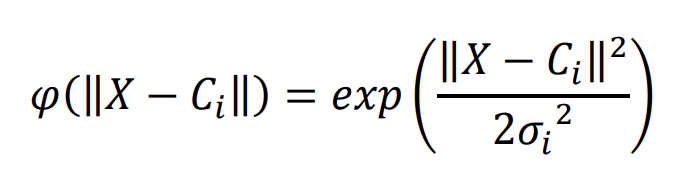

# Вычисление весов с помощью псевдообратной матрицы
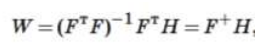

# Параметры обучения нейронной сети

*   **sigma** - коэффициент сигма - ширина окна активационной функции
*   **size** - количество радиально-базисных нейронов


Для обучения был сгенерирован набор из 300 точек X от 0 до 4П, к ним была применена функция синуса и добавлен случайный шум

In [10]:
size = 12                                                                       # Параметр size (можно менять, чем меньше - тем меньше точность)
sigma = 1                                                                       # Параметр sigma (не трогал, всегда пробовал с 1)

# Обучение нейронной сети

In [11]:
amount = 300                                                                    # Количество генерируемых точек
x = np.linspace(0, 4*np.pi, amount)                                             # Генерация X
y = np.sin(x) + np.random.uniform(-0.15, +0.15, size = amount)                  # Генерация Y путем применения sin(X) и добавления случайного шума

model = RBF_Network(size, sigma)                                                # Иницализация модели ()
model.fit(x, y)                                                                 # Обучение модели на сгенерированных точках

# Проверка обученной модели

Можно менять параметры и запускать ячейку

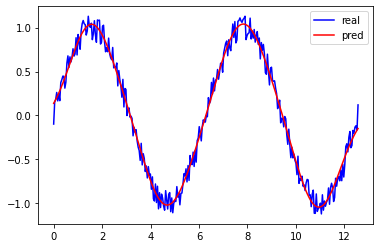

In [12]:
y_pred = model.predict(x)

plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='pred')
plt.legend(loc='upper right')
plt.show()

Дальше просто последовательные тесты модели с количеством радиально-базисных нейронов от 1 до 10

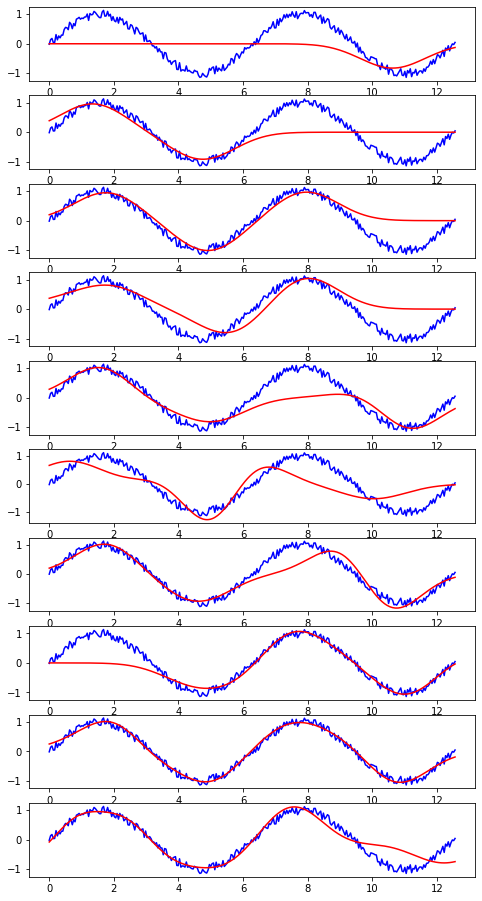

In [6]:
fig, axs = plt.subplots(10, 1, figsize = (8, 16))
for i in range(10):
    model = RBF_Network(i + 1, 1)
    model.fit(x, y)    
    y_pred = model.predict(x)
    axs[i].plot(x, y, 'b-', label='real')
    axs[i].plot(x, y_pred, 'r-', label='pred')
plt.show()